## Pyber Ridesharing Observations:
        1). Urban city types have the lowest average fare price considering they also have the highest driver count and number of rides.
        
        2). The Suburban city types represent the median average fare price, driver count and number of rides.
        
        3). The Rural city types have the highest average fare price due to having the lowest driver count and total number of rides.
        
        In conclusion, the average fare price is dependent upon the city types total driver and ride counts. City types with more drivers/ride counts appear to have lower average fare prices and city types with less drivers/overall rides produce higher fare values.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df = pd.read_csv(city_data_to_load)

# Combine the data into a single dataset
Pyber_Data = pd.merge(ride_data_df, city_data_df, how="outer", on="city")

# Display the data table for preview
Pyber_Data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
Pyber_Types = Pyber_Data.groupby(["type"]).count()
Pyber_Types

,city,date,fare,ride_id,driver_count
type,,,,,
Rural,125,125,125,125,125
Suburban,625,625,625,625,625
Urban,1625,1625,1625,1625,1625


# Ride Sharing Data
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In [3]:
# Average Fare ($) Per City
Total_Fares_By_Type = Pyber_Data.groupby(["type"])
Total_Fares_By_Type = (Total_Fares_By_Type["fare"].sum())

Total_Fares = Pyber_Data["fare"].sum()

Fares_Percent = (Total_Fares_By_Type/Total_Fares)*100

In [4]:
# Total Number of Rides Per City
Total_Rides_By_Type = Pyber_Data.groupby(["type"])
Total_Rides_By_Type = (Total_Rides_By_Type["ride_id"].count())

Total_Rides = Pyber_Data["ride_id"].count()

Rides_Percent = (Total_Rides_By_Type/Total_Rides)*100

In [5]:
# Total Number of Drivers Per City
Total_Drivers_By_Type = city_data_df.groupby(["type"])
Total_Drivers_By_Type = (Total_Drivers_By_Type["driver_count"].sum())

Total_Drivers = city_data_df["driver_count"].sum()

Drivers_Percent = (Total_Drivers_By_Type/Total_Drivers)*100

In [6]:
# City Type (Urban, Suburban, Rural)
Urban_Cities = Pyber_Data[Pyber_Data["type"]== "Urban"]

Suburban_Cities = Pyber_Data[Pyber_Data["type"]== "Suburban"]

Rural_Cities = Pyber_Data[Pyber_Data["type"]== "Rural"]

City_Types = ["Urban_Cities", "Surburban_Cities", "Rural_Cities"]

In [7]:
Pyber_DF = pd.DataFrame({"% of Total Fare Per City Type": Fares_Percent,
                              "% of Total Rides Per City Type": Rides_Percent,
                              "% of Total Drivers Per City Type": Drivers_Percent})
Pyber_DF.round(2)

,% of Total Fare Per City Type,% of Total Rides Per City Type,% of Total Drivers Per City Type
type,,,
Rural,6.81,5.26,2.62
Suburban,30.46,26.32,16.48
Urban,62.72,68.42,80.89


## Bubble Plot of Ride Sharing Data

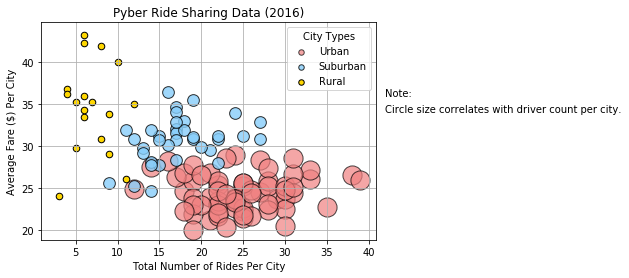

In [8]:
# Obtain the x and y coordinates for each of the three city types
# X = Number of Rides, Y = Average Fare, ___ Driver Count

UrbanX = Urban_Cities.groupby("city")["fare"].count()
UrbanY = Urban_Cities.groupby("city")["fare"].mean().round(2)
UrbanZ = (Urban_Cities["driver_count"].mean())

SuburbanX = Suburban_Cities.groupby("city")["fare"].count()
SuburbanY = Suburban_Cities.groupby("city")["fare"].mean().round(2)
SuburbanZ = (Suburban_Cities["driver_count"].mean())

RuralX = Rural_Cities.groupby("city")["fare"].count()
RuralY = Rural_Cities.groupby("city")["fare"].mean().round(2)
RuralZ = (Rural_Cities["driver_count"].mean())

# Build the scatter plots for each city types
Urban = plt.scatter(UrbanX, UrbanY, UrbanZ*10, color ="lightcoral", label = "Urban", cmap="Blues", alpha=.7, edgecolors="black", linewidth=1)
Suburban = plt.scatter(SuburbanX, SuburbanY, SuburbanZ*10, color="lightskyblue", label = "Suburban", cmap="Blues", alpha=.8, edgecolors="black", linewidth=1)
Rural = Rural = plt.scatter(RuralX, RuralY, RuralZ*10, color="gold", label = "Rural", cmap="Blues", alpha=1, edgecolors="black", linewidth=1)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($) Per City")
plt.axis("tight")
plt.grid()

# Create a legend
lgnd= plt.legend(title="City Types", handles=[Urban, Suburban, Rural])
for handler in lgnd.legendHandles:
    handler._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,36, "Note:")
plt.text(42,34, "Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Images/Pyber Ride Sharing Data (2016)")

# Show Figure
plt.show()

## Total Fares by City Type

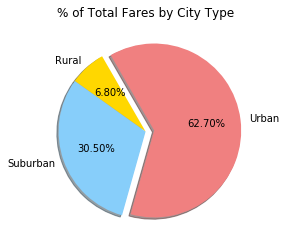

In [9]:
# Calculate Type Percents
Fares_Percent

# Build Pie Chart
plt.title ("% of Total Fares by City Type")
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(Fares_Percent.round(1), explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=120)

# Save Figure
plt.savefig("Images/% of Total Fares")

# Show Figure
plt.show()

## Total Rides by City Type

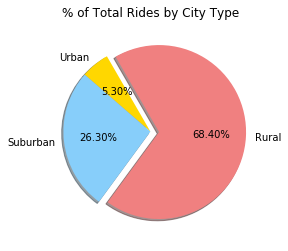

In [10]:
# Calculate Type Percents
Rides_Percent

# Build Pie Chart
plt.title ("% of Total Rides by City Type")
labels = ["Urban", "Suburban", "Rural"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(Rides_Percent.round(1), explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=120)

# Save Figure
plt.savefig("Images/% of Total Rides")

# Show Figure
plt.show()

## Total Drivers by City Type

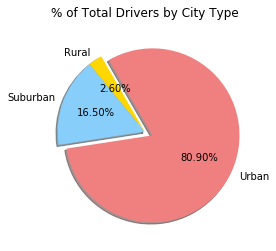

In [11]:
# Calculate Type Percents
Drivers_Percent

# Build Pie Chart
plt.title ("% of Total Drivers by City Type")
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(Drivers_Percent.round(1), explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=120)

# Save Figure
plt.savefig("Images/% of Total Drivers.png")

# Show Figure
plt.show()